In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Fri Sep 11 09:36:48 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    23W / 300W |      0MiB / 16130MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
 from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import keras
print(keras.__version__)
import tensorflow as tf
print(tf.__version__)

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:472: FutureWarn

1.2.2
1.4.0


In [4]:
!pip install keras==1.2.2

     |████████████████████████████████| 184kB 9.4MB/s 
  Created wheel for keras: filename=Keras-1.2.2-cp36-none-any.whl size=209603 sha256=b16b4f398c7e8d2840c5f467b9a7511bb847fec20ce0fb1eb6e20eff73906a2d
  Stored in directory: /root/.cache/pip/wheels/55/07/cf/b32db0a8d243b2fd6759d5d7cb650aa20670b2b740209cbf7e
Successfully built keras
ERROR: textgenrnn 1.4.1 has requirement keras>=2.1.5, but you'll have keras 1.2.2 which is incompatible.
ERROR: kapre 0.1.3.1 has requirement keras>=2.0.0, but you'll have keras 1.2.2 which is incompatible.
ERROR: fancyimpute 0.4.3 has requirement keras>=2.0.0, but you'll have keras 1.2.2 which is incompatible.
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [5]:
!pip install tensorflow==1.4

     |████████████████████████████████| 41.2MB 73kB/s 
     |████████████████████████████████| 1.7MB 59.6MB/s 
     |████████████████████████████████| 890kB 53.8MB/s 
  Created wheel for html5lib: filename=html5lib-0.9999999-cp36-none-any.whl size=107220 sha256=5ba7133866715353a63dcb3ae8f342c9c1f35519cb4aa74105924fc095b9ad23
  Stored in directory: /root/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
Successfully built html5lib
ERROR: fancyimpute 0.4.3 has requirement keras>=2.0.0, but you'll have keras 1.2.2 which is incompatible.
  Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Found existing installation: bleach 3.1.5
    Uninstalling bleach-3.1.5:
      Successfully uninstalled bleach-3.1.5
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


In [3]:
import numpy as np

from PIL import Image
from IPython.html.widgets import interact
from sklearn.metrics import roc_auc_score
from keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [16]:
import os
import random
import cv2

In [5]:
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [14]:
def resize_img(im_pth,grayscale,desired_size = 512 ):
  im = Image.open(im_pth)
  old_size = im.size  # old_size[0] is in (width, height) format
  im = cv2.imread(im_pth)
  if grayscale:
    im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
  old_size = im.shape[:2] # old_size is in (height, width) format
  ratio = float(desired_size)/max(old_size)
  new_size = tuple([int(x*ratio) for x in old_size])

  # new_size should be in (width, height) format
  im = cv2.resize(im, (new_size[1], new_size[0])) 

  delta_w = desired_size - new_size[1]
  delta_h = desired_size - new_size[0]
  top, bottom = delta_h//2, delta_h-(delta_h//2)
  left, right = delta_w//2, delta_w-(delta_w//2)

  color = [0, 0, 0]
  new_im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,
      value=color)
  return new_im

In [6]:
def load_dataset(data_dir='data', color_mode='rgb', target_size=(512, 512)):
    """Load dataset into memory."""
    imgs = []
    y = []

    classes = os.listdir(data_dir)
    classes.sort()
    for i, c in enumerate(classes):
        c_imgs = os.listdir(os.path.join(data_dir, c))
        imgs.extend([os.path.join(data_dir, c, c_img) for c_img in c_imgs])
        y.extend([i]*len(c_imgs))

    N = len(imgs)
    idx = np.arange(N)
    random.shuffle(idx)

    imgs = np.array(imgs)
    y = np.array(y, dtype=np.int8)

    imgs = imgs[idx]
    y = y[idx]

    grayscale = False
    channels = 3
    if color_mode == 'grayscale':
        grayscale = True
        channels = 1

    # X = np.zeros((N, channels) + target_size, dtype=np.float32)
    X = np.zeros((N,) + target_size+(channels,), dtype=np.float32)
    for i, img_path in enumerate(imgs):
        # print(img_path)
        if 'bad' in img_path:
          img = resize_img(img_path,desired_size=512,grayscale=grayscale)
          img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
          # img = np.moveaxis(img,-1,0)
        else:
          img = load_img(img_path, grayscale=grayscale, target_size=target_size)
          # img = img_to_array(img)
          # img = np.moveaxis(img,-1,0)

        X[i] = img_to_array(img)

    return X, y

In [7]:
def get_data_iterators(horizontal_flip=True, vertical_flip=True, width_shift_range=0.15,
                       height_shift_range=0.15, rotation_range=45, zoom_range=0.15,
                       batch_size=1, data_dir='data', target_size=(512, 512),
                       samplewise_center=False, samplewise_std_normalization=False,
                       fill_mode='constant', rescale=None, load_train_data=True,
                       color_mode='rgb'):
    """Create data iterator."""
    aug_gen = ImageDataGenerator(horizontal_flip=horizontal_flip, vertical_flip=vertical_flip,
                                 width_shift_range=width_shift_range, height_shift_range=height_shift_range,
                                 rotation_range=rotation_range, zoom_range=zoom_range,
                                 samplewise_std_normalization=samplewise_std_normalization,
                                 samplewise_center=samplewise_center, fill_mode=fill_mode,
                                 rescale=rescale)
    data_gen = ImageDataGenerator(samplewise_std_normalization=samplewise_std_normalization,
                                  samplewise_center=samplewise_center, rescale=rescale)

    if load_train_data:
        X_train, y_train = load_dataset(data_dir=os.path.join(data_dir, 'train'), target_size=target_size,
                                        color_mode=color_mode)
        train_it = aug_gen.flow(X_train, y_train, batch_size=batch_size)
    else:
        train_it = aug_gen.flow_from_directory(os.path.join(data_dir, 'train'),
                                               batch_size=batch_size, target_size=target_size,
                                               class_mode='binary', color_mode=color_mode)

    if load_train_data:
        X_val, y_val = load_dataset(data_dir=os.path.join(data_dir, 'val'), target_size=target_size,
                                    color_mode=color_mode)
        val_it = data_gen.flow(X_val, y_val, batch_size=batch_size, shuffle=False)
    else:
        val_it = data_gen.flow_from_directory(os.path.join(data_dir, 'val'),
                                              batch_size=batch_size, target_size=target_size,
                                              class_mode='binary', color_mode=color_mode)

    if load_train_data:
        X_test, y_test = load_dataset(data_dir=os.path.join(data_dir, 'test'), target_size=target_size,
                                    color_mode=color_mode)
        test_it = data_gen.flow(X_test, y_test, batch_size=batch_size, shuffle=True)
    else:
        test_it = data_gen.flow_from_directory(os.path.join(data_dir, 'test'),
                                           batch_size=batch_size, target_size=target_size,
                                           class_mode='binary', color_mode=color_mode,
                                           shuffle=True)

    return train_it, val_it, test_it

In [8]:
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import Input, Flatten
from keras.regularizers import WeightRegularizer
from keras.layers.convolutional import Convolution2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D, AveragePooling2D

# from utils.layers import WeightedAveragePooling, SWAP

In [10]:
import numpy as np

from keras import activations
from keras import constraints
from keras import regularizers
from keras import initializations
from keras.engine import Layer, InputSpec

from keras import backend as K


class WeightedAveragePooling(Layer):

    def __init__(self, shape, **kwargs):
        self.shape = shape
        super(WeightedAveragePooling, self).__init__(**kwargs)

    def build(self, input_shape):
        init = initializations.get('one')
        self.alpha = self.add_weight(shape=self.shape, initializer=init,
                                     name='alpha')

    def call(self, x, mask=None):
        alpha_sig = K.abs(self.alpha)
        alpha_batch = K.repeat_elements(alpha_sig, K.shape(x)[0], 0)
        normed_x = x * alpha_batch
        sum_x = K.expand_dims(K.sum(normed_x, axis=(1, 2, 3)))
        sum_alpha = K.expand_dims(K.sum(alpha_batch, axis=(1, 2, 3)))
        return sum_x / (sum_alpha + K.epsilon())

    def get_output_shape_for(self, input_shape):
        return (input_shape[0], 1)

    def get_config(self):
        config = {
            'shape': self.shape,
        }
        base_config = super(WeightedAveragePooling, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))


class SWAP(Layer):

    def __init__(self, output_dim, init='glorot_uniform',
                 activation=None, weights=None,
                 W_regularizer=None, b_regularizer=None, activity_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True, input_dim=None, **kwargs):
        self.init = initializations.get(init)
        self.activation = activations.get(activation)
        self.output_dim = output_dim
        self.input_dim = input_dim

        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)
        self.activity_regularizer = regularizers.get(activity_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        self.initial_weights = weights
        self.input_spec = [InputSpec(ndim='2+')]

        if self.input_dim:
            kwargs['input_shape'] = (self.input_dim,)
        super(SWAP, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) >= 2
        input_dim = input_shape[-1]
        self.input_dim = input_dim
        self.input_spec = [InputSpec(dtype=K.floatx(),
                                     ndim='2+')]

        self.W = self.add_weight((input_dim, self.output_dim),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        if self.bias:
            self.b = self.add_weight((self.output_dim,),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)
            w, b = self.get_weights()
            w = w / np.sum(np.absolute(w))
            self.set_weights([w, b])
        else:
            self.b = None

        if self.initial_weights is not None:
            self.set_weights(self.initial_weights)
            del self.initial_weights
        self.built = True

    def call(self, x, mask=None):
        output = K.dot(x, K.abs(self.W))
        if self.bias:
            output -= 0.5 * np.ones((1,))
            output += self.b
        return self.activation(output)

    def get_output_shape_for(self, input_shape):
        assert input_shape and len(input_shape) >= 2
        assert input_shape[-1] and input_shape[-1] == self.input_dim
        output_shape = list(input_shape)
        output_shape[-1] = self.output_dim
        return tuple(output_shape)

    def get_config(self):
        config = {'output_dim': self.output_dim,
                  'init': self.init.__name__,
                  'activation': self.activation.__name__,
                  'W_regularizer': self.W_regularizer.get_config() if self.W_regularizer else None,
                  'b_regularizer': self.b_regularizer.get_config() if self.b_regularizer else None,
                  'activity_regularizer': self.activity_regularizer.get_config() if self.activity_regularizer else None,
                  'W_constraint': self.W_constraint.get_config() if self.W_constraint else None,
                  'b_constraint': self.b_constraint.get_config() if self.b_constraint else None,
                  'bias': self.bias,
                  'input_dim': self.input_dim}
        base_config = super(SWAP, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

In [11]:
def Convolution(f, k=3, s=2, border_mode='same', **kwargs):
    """Convenience method for Convolutions."""
    return Convolution2D(f, k, k, border_mode=border_mode, subsample=(s, s), **kwargs)


def BatchNorm(mode=2, axis=1, **kwargs):
    """Convenience method for BatchNormalization layers."""
    return BatchNormalization(mode=mode, axis=axis, **kwargs)


def ConvBlock(i, nf, k=3, s=1, border_mode='same', maxpool=True, norm=True, **kwargs):
    """A Conv-Pool-LeakyRelu-Batchnorm block."""
    x = Convolution(nf, k=k, s=s, border_mode=border_mode, **kwargs)(i)
    if maxpool:
        # print(x.shape)
        x = MaxPooling2D((2, 2))(x)

    x = LeakyReLU(0.02)(x)

    if norm:
        x = BatchNorm()(x)

    # print(x.shape)
    return x


def micnn(nf, input_size=512, n_blocks=4):
    """
    The micnn model.
    The model extracts features from the input. Then we just need to run a
    1x1 Convolution on top of these features to get a heatmap.
    """
    # img = Input(shape=(3,) + (input_size, input_size))
    input_shape = (input_size,input_size,3)
    img = Input(shape=input_shape)

    ###########################################################################
    #                           MAIN NETWORK DEFINITION                       #
    ###########################################################################
    xi = img
    # print(n_blocks)
    for i in range(n_blocks):
        nfi = nf * 2**i
        # print(i,xi.shape,nfi)
        if nfi > nf * 8:
            nfi = nf * 8

        xi = ConvBlock(xi, nfi, maxpool=True, norm=True)
    ###########################################################################
    #                           FINAL CLASSIFICATIONS                         #
    ###########################################################################
    xi = ConvBlock(xi, nfi, k=1, s=1, maxpool=False)

    return img, xi


def get_out_size(input_size, n_blocks):
    return input_size / (2**n_blocks)


def quality_assessment(nf, l2=0, input_size=512, n_blocks=4, lr=2e-4,
                       pooling='SWAP', pooling_wreg=1, pooling_breg=1e-1):
    """EyeQual implementation."""
    out_size = get_out_size(input_size, n_blocks)
    img, xi = micnn(nf, input_size=input_size, n_blocks=n_blocks)
    quality_map = Convolution(1, k=1, s=1, activation='sigmoid')(xi)

    if pooling == 'SWAP':
        out = Flatten()(quality_map)
        out = SWAP(1, activation='sigmoid', W_regularizer=WeightRegularizer(l2=pooling_wreg),
                   init='one', b_regularizer=WeightRegularizer(l2=pooling_breg),
                   name='pool')(out)
    elif pooling == 'WAP':
        out = WeightedAveragePooling((1, 1, out_size, out_size), name='pool')(quality_map)
    elif pooling == 'AP':
        out = AveragePooling2D((out_size, out_size))(quality_map)
        out = Flatten()(out)
    elif pooling == 'MP':
        out = MaxPooling2D((out_size, out_size))(quality_map)
        out = Flatten()(out)

    quality_model = Model(img, quality_map)
    model = Model(img, out)

    opt = Adam(lr=lr)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

    return model, quality_model

In [12]:
batch_size = 8
load_data = True
weak_dir = '/content/drive/My Drive/CMKL/datasets/quality'
epochs =5

"""
Dataset augmentation's parameters
"""
aug_params = {'horizontal_flip': True,
              'vertical_flip': True,
              'width_shift_range': 0.05, 
              'height_shift_range': 0.05, 
              'rotation_range': 360, 
              'zoom_range': 0.02}

"""
Model parameter's definition
"""
nf = 64
n_blocks = 4
input_size = 512
pooling_wreg = 1e-2
pooling_breg = 1e-3
lr = 2e-4

"""
Callbacks' definition
"""
experiment_path = "/content/drive/My Drive/CMKL/datasets/quality/experiments/GAP.hdf5"
patience = 0
checkpointer = ModelCheckpoint(filepath=experiment_path, verbose=1, 
                               save_best_only=True, save_weights_only=False)
callbacks = [checkpointer]

In [17]:
flag_resize_train,flag_resize_val,flag_resize_test = False,False,False
train_it, val_it, test_it = get_data_iterators(batch_size=batch_size, data_dir=weak_dir, 
                                                     target_size=(512, 512), samplewise_center=False, 
                                                     samplewise_std_normalization=False, rescale=1/255., 
                                                     fill_mode='constant', load_train_data=load_data, 
                                                     color_mode='rgb', **aug_params)

In [18]:
eyequal, heatmap = quality_assessment(nf, input_size=input_size, n_blocks=n_blocks, lr=lr, 
                                             pooling_wreg=pooling_wreg, pooling_breg=pooling_breg)

In [19]:
# eyequal.summary()

In [20]:
eyequal.fit_generator(generator=train_it, samples_per_epoch=train_it.n, nb_epoch=epochs, validation_data=val_it, nb_val_samples=val_it.n,callbacks=callbacks,verbose=1)

Epoch 1/5
45/45 [==============================] - 207s - loss: 0.6000 - acc: 0.8000 - val_loss: 0.4607 - val_acc: 1.0000
Epoch 2/5
45/45 [==============================] - 206s - loss: 0.4335 - acc: 1.0000 - val_loss: 0.3379 - val_acc: 1.0000
Epoch 3/5
45/45 [==============================] - 206s - loss: 0.3304 - acc: 1.0000 - val_loss: 0.2815 - val_acc: 1.0000
Epoch 4/5
45/45 [==============================] - 205s - loss: 0.2800 - acc: 1.0000 - val_loss: 0.2400 - val_acc: 1.0000
Epoch 5/5
45/45 [==============================] - 206s - loss: 0.2577 - acc: 1.0000 - val_loss: 0.2258 - val_acc: 1.0000


In [21]:
x, y = next(val_it)

heat_pred = heatmap.predict(x)


interactive(children=(Dropdown(description='idx', options=(0, 1, 2, 3, 4, 5, 6, 7), value=0), Output()), _dom_…

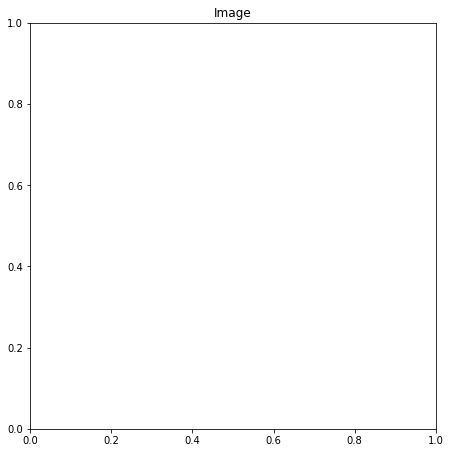

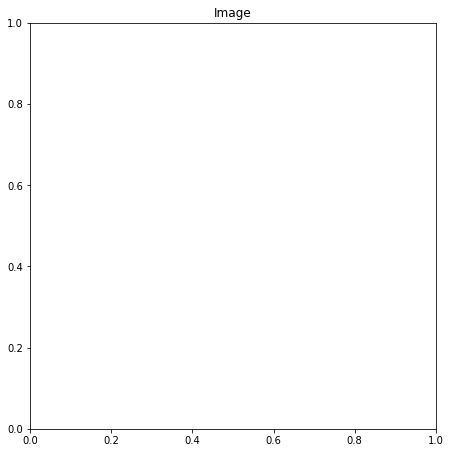

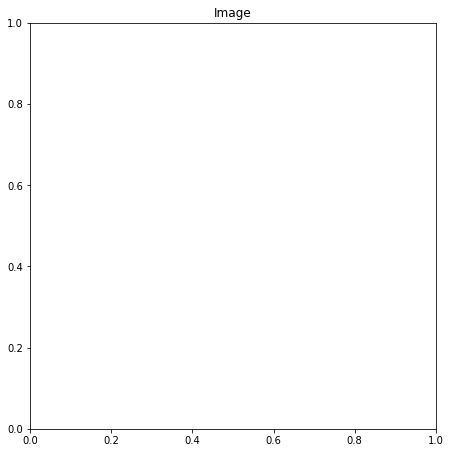

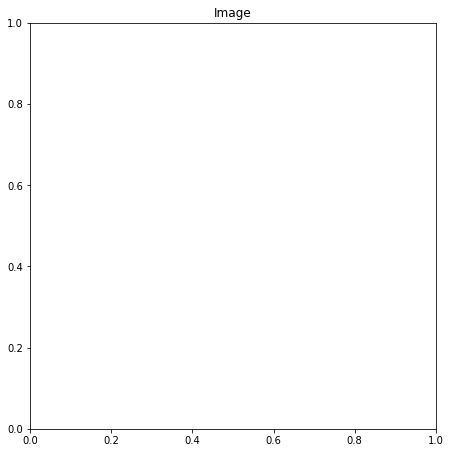

In [23]:
def plot_figs(idx=0):
    print(y)
    print('Pred = {0}; GT = {1}'.format(eyequal.predict(x)[idx], y[idx]))
    
    heat_pred_img = heat_pred[idx, 0]
    x_plot = np.transpose(x[idx], (1, 2, 0))
    
    plt.figure(figsize=(16, 21))
    
    plt.subplot(1, 2, 1)
    plt.title('Image')
    plt.imshow(x_plot)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Quality Map')
    plt.imshow(x_plot)
    im = get_quality_map(heat_pred_img, n_blocks=n_blocks)
    plt.imshow(im, alpha=0.5, vmin=0, vmax=1, cmap=parula_map)
    plt.axis('off')
    
    plt.show()
    
interact(plot_figs, idx=range(batch_size));

In [24]:
heat_pred.shape

(7, 32, 32, 1)

In [228]:
Model.fit_generator()

45

In [152]:
batchX,batchY = val_it.next()

In [153]:
batchX.shape,batchY.shape

((7, 512, 512, 3), (7,))

(512, 512, 3) 0.0


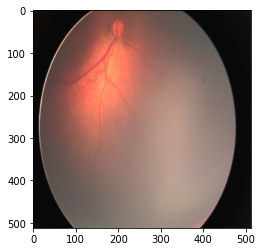

In [156]:
ix = 0
x,y = batchX[ix,:,:,:],batchY[ix]
print(x.shape,y)
plt.imshow(x)

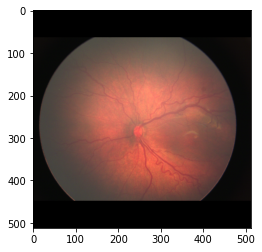

In [201]:
img_path = '/content/drive/My Drive/CMKL/datasets/quality/train/bad/ebe4ae2e-bd5a-4ccf-bbc7-de4815807be4.17.png'
new_img = resize_img(img_path,grayscale=False,desired_size=512)
new_img = cv2.cvtColor(new_img,cv2.COLOR_BGR2RGB)
plt.imshow(new_img)

In [175]:
print(new_img.shape)
new_img2 = np.moveaxis(new_img,-1,0)
print(new_img2.shape)

(512, 512, 3)
(3, 512, 512)


In [169]:

eyequal.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_14 (InputLayer)            (None, 3, 512, 512)   0                                            
____________________________________________________________________________________________________
convolution2d_27 (Convolution2D) (None, 3, 512, 64)    294976      input_14[0][0]                   
____________________________________________________________________________________________________
maxpooling2d_23 (MaxPooling2D)   (None, 3, 256, 32)    0           convolution2d_27[0][0]           
____________________________________________________________________________________________________
leakyrelu_15 (LeakyReLU)         (None, 3, 256, 32)    0           maxpooling2d_23[0][0]            
___________________________________________________________________________________________